In [8]:
from PIL import Image
from skimage import data, io
import numpy as np
from sklearn import preprocessing
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import urllib.request
from bs4 import BeautifulSoup
import urllib
from bs4.element import Comment
import pandas
from collections import Counter
%pylab inline

pic=[]
pic.append(data.imread("/home/gabor/Desktop/pic.jpg"))
pic.append(data.imread("/home/gabor/Desktop/pic2.jpg"))
pic.append(data.imread("/home/gabor/Desktop/pic3.jpg"))
pic.append(data.imread("/home/gabor/Desktop/pic4.jpg"))
pic.append(data.imread("/home/gabor/Desktop/pic5.jpg"))

for i in range(5):
    Image.fromarray(pic[i], 'RGB').show()
    print("%i. kép R csatorna:" %(i+1))
    print(pic[i][:,:,0])
    print("%i. kép G csatorna:" %(i+1))
    print(pic[i][:,:,1])
    print("%i. kép B csatorna:" %(i+1))
    print(pic[i][:,:,2])

Populating the interactive namespace from numpy and matplotlib
1. kép R csatorna:
[[253 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 254 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]
1. kép G csatorna:
[[253 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 254 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]
1. kép B csatorna:
[[253 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 254 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]
2. kép R csatorna:
[[115 113 115 ...,  38  15  39]
 [114 112 116 ...,  42  22  39]
 [113 113 116 ...,  46  30  42]
 ..., 
 [ 56  51  29 ...,  45  32  44]
 [ 63  51  21 ...,  56  37  53]
 [ 70  55  23 ...,  67  42  62]]
2. kép G csatorna:
[[117 114 116 ...,  23  14  31]
 [116 114 

/home/gabor/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
r=[]
g=[]
b=[]
for i in range(32):
    for j in range(32):
        ideig_R=np.zeros((5,1))
        ideig_G=np.zeros((5,1))
        ideig_B=np.zeros((5,1))
        for k in range(5):
            ideig_R[k,0]=pic[k][i,j,0]
            ideig_G[k,0]=pic[k][i,j,1]
            ideig_B[k,0]=pic[k][i,j,2]
        r.append(ideig_R)
        g.append(ideig_G)
        b.append(ideig_B)

s=preprocessing.StandardScaler()
for i in range(1024):
    s.fit(r[i])
    r[i]=s.transform(r[i])
    s.fit(g[i])
    g[i]=s.transform(g[i])
    s.fit(b[i])
    b[i]=s.transform(b[i])

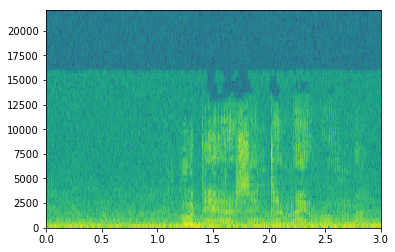

In [4]:
freq, data = wavfile.read("/home/gabor/Desktop/test.wav")
plt.specgram(data[:,0], 200, freq)
plt.show()

        Connect with Snopes      TOP TAGS:   ASP Article donald trump barack obama hillary clinton Not Necessarily The News animals election 2016 fake news politics music hoaxes facebook Movies something for nothing Radio & TV Television           What’s New  Hot 50  Fact Check  News  Video  Archive  About  FAQ  Contact  Random                                        What's New    Hot 50    Fact Check    News    Video      Archive    Automobiles    Business    Cokelore    College    Computers    Crime    Critter Country    Disney    Embarrassments    Fauxtography    Food    Fraud & Scams    Glurge Gallery    History    Holidays    Horrors    Inboxer Rebellion    Language    Legal Affairs    Lost Legends    Love    Media Matters    Medical    Military    Questionable Quotes    Racial Rumors    Radio & TV    Religion    Risqué Business    Science    September 11th    Sports    Travel    Weddings      About    FAQ    Contact    Random                 Automobiles  Business  Cokelore  Colleg

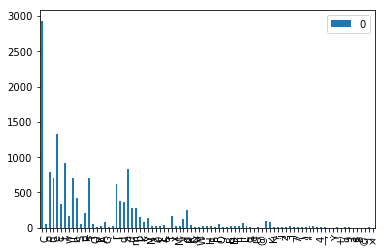

In [9]:
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

html = urllib.request.urlopen("http://www.snopes.com/facebook-ai-developed-own-language/").read()
text=text_from_html(html)
print(text)

letter_counts = Counter(text)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')